# **UTS PENAMBANGAN DATA**

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

In [197]:
import pandas as pd
import numpy as np

In [198]:
from sklearn.model_selection import train_test_split #split data dari data training menjadi data testing

In [199]:
from sklearn.neighbors import KNeighborsClassifier #Membuat klasifikasi KNN

In [200]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [201]:
dataset_url = "https://raw.githubusercontent.com/HanifSantoso05/dataset_matkul/main/dataR2.csv"

In [202]:
df = pd.read_csv(dataset_url)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [203]:
df.shape

(116, 10)

## KNN CANCER DATASET

### Hitung Data

*   Pisahkan kolom "classification" dari *dataframe*
*   Ambil kolom "classification" sebagai target kolom untuk kategori kelas
*   Pisahkan data latih dengan data tes


```
# data latih (nilai data)
X_train 

# data tes (nilai data)
X_test 

# data latih (kelas data)
y_train

# data tes (kelas data)
y_test
```





In [204]:
#membuat dataframe tanpa adanya atribut classification
x = df.drop(columns=["Classification"]) #check atribut apakah sudah hilang
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [205]:
# separate target values
y = df["Classification"].values  # view target values
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [206]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_amount_of_test_data = 0.2

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = percent_amount_of_test_data, random_state=1, stratify=y)



*   Tentukan nilai K = 10 (10 tetangga terdekat)



```
knn_classifier.fit(train_data)
```




In [208]:
amount_of_neighbor = 10

*   Buat data latih

In [209]:
# Fit the classifier to the data
knn = KNeighborsClassifier(n_neighbors = amount_of_neighbor)

# create train data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)



*   Tes data target terhadap data latih




```
knn_classifier.predict(test_data)
```





*   Tampilkan predksi 10 data pertama

In [210]:
#show first 5 model predictions on the test data
knn.predict(x_test)

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2])



*   Cetak prediksi nilai dari data tes



```
knn_classifier.score(test_data)
```





In [211]:
#check accuracy of our model on the test data
knn.score(x_test, y_test)

0.5

* Cek menggunakan data testing yang di ambil dari data cancer

In [212]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [213]:
# Custom value to predict (1) based on manual calculation
knn.predict([[45, 21.30394858, 102, 13.852, 3.4851632, 7.6476, 21.056625, 23.03408,	552.444]])

array([1])

In [214]:
# Custom value to predict (2)
knn.predict([[72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46]])

array([2])

In [215]:
# Custom value to predict (3) based on manual calculation
knn.predict([[86,27.180000,138,19.910,6.777364,90.2800,14.110000,4.35000,90.090]])

array([2])

### Kesimpulan


*   Dataset Breast Cancer Combria terdiri dari 116 data
*   Ambil **80%** dari data Breast Cancer Combria sebagai **data latih**
*   Ambil **20%** dari data Breast Cancer Combria sebagai **data tes**
*   Tetapkan nilai K = 10
*   Hasil 10 data pertama dari 20% data latih


```
"""
1 = Healthy controls 
2 = Patients
"""
[1, 1, 1, 2, 1, 2, 2, 2, 2, 1]
```
*   Dengan akurasi data yaitu $ 0.5\% $





## DECISION TREE CANCER DATASET

## **Pengertian**

Decision tree merupakan metode non parametrik yang digunakan untuk klasifikasi dan regresi. Tujuan dari decision tree adalah membuat model yang memprediksi nilai variabel target dengan mengikuti aturan keputusan sederhana dari fitur data yang tersedia

## **Algoritma Decision Tree**
* Decision Tree adalah jenis white box algoritma dalam machine learning yang 
menggunakan internal decision making logic. Hal ini tidak terdapat dapat pada jenis black box algoritma yaitu neural network. Waktu pengambilan data training decision tree lebih cepat dibandingkan Neural Network.
* Fungsi Kompleksitas Decision Tree adalah fungsi dari jumlah yang records serta atribut dalam data yang diberikan.
## **Kerja Algoritma Decision Tree**
* Memilih atribut terbaik menggunakan Attribution Selection Measures (ASM) untuk membagi records data
* Membuat atribut menjadi decision node dan memecah dataset menjadi subsets yang lebih kecil.
* Mulai membangun pohon dengan mengulangi proses ini secara rekursif, untuk setiap cabang sampai salah satu dari kondisi tersebut akan cocok

![original image](https://cdn.mathpix.com/snip/images/ADAC9uCjsnrU9p6C0YVz5uw86VBsie6bYW88Nbp6BUQ.original.fullsize.png)


In [216]:
import matplotlib.pyplot as plt  
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [217]:
df.head(-1)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
110,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280,2
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2


In [227]:
# x sebagai variable independent
x = df.drop(['Classification'], axis = 1)
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [228]:
# y sebagai variable dependent
y = df['Classification']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

* Membuat data training

In [220]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [229]:
x_train

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
43,69,32.500000,93,5.430,1.245642,15.1450,11.787960,11.78796,270.142
98,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001
80,59,28.672626,77,3.188,0.605507,17.0220,16.440480,31.69040,910.489
72,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.21000,513.660
31,53,36.790166,101,10.175,2.534932,27.1841,20.030000,10.26309,695.754
...,...,...,...,...,...,...,...,...,...
76,55,31.975015,92,16.635,3.775036,37.2234,11.018455,7.16514,483.377
10,34,21.470000,78,3.469,0.667436,14.5700,13.110000,6.92000,354.600
28,35,35.250761,90,6.817,1.513374,50.6094,6.966895,22.03703,667.928
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160


In [230]:
# membangun decision tree menggunakan gini
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train,y_train)

#Prediksi data test
y_pred = clf.predict(x_test)

* Menampilkan tingkat accuracy

In [231]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70        13
           2       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29



* Menampilkan gambaran hasil dari prediksi menggunakan decision tree

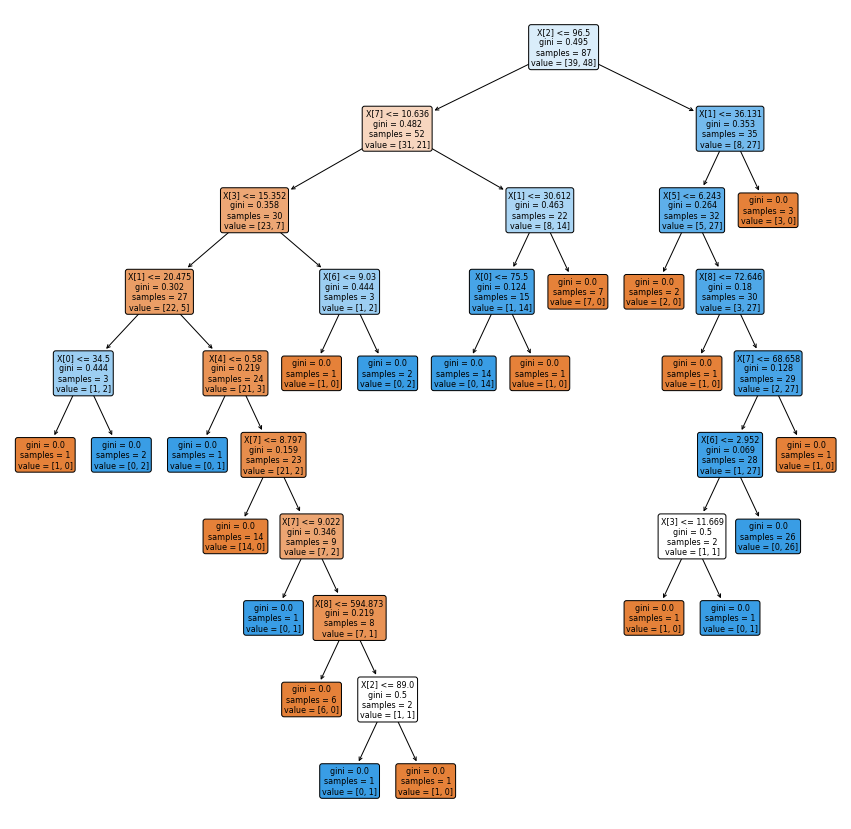

In [224]:
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()